Kütüphaneler

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
cafe = sns.load_dataset('tips')
df = cafe.copy()
df.drop('day',axis=1,inplace=True)

In [161]:
df.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,Female,No,Dinner,2
1,10.34,1.66,Male,No,Dinner,3
2,21.01,3.50,Male,No,Dinner,3
3,23.68,3.31,Male,No,Dinner,2
4,24.59,3.61,Female,No,Dinner,4


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 6.9 KB


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Dummy kullanarak string değerleri numeric ifade edeceğim

In [164]:
dummys = pd.get_dummies(df[['sex','time','smoker']])

In [165]:
dummys.drop(['sex_Female','time_Lunch','smoker_No'],axis=1,inplace=True)

In [166]:
df.drop(['sex','smoker','time'],axis=1,inplace=True)

In [167]:
dummys.columns = ['isMale','isDinner','isSmoker']

In [168]:
dummys

,isMale,isDinner,isSmoker
0,0,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,0,1,0
...,...,...,...
239,1,1,0
240,0,1,1
241,1,1,1
242,1,1,0


In [169]:
#df.drop(['sex','smoker','time'],axis=1,inplace=True)

In [170]:
newdf = pd.concat([dummys,df],axis=1)

In [171]:
newdf

,isMale,isDinner,isSmoker,total_bill,tip,size
0,0,1,0,16.99,1.01,2
1,1,1,0,10.34,1.66,3
2,1,1,0,21.01,3.50,3
3,1,1,0,23.68,3.31,2
4,0,1,0,24.59,3.61,4
...,...,...,...,...,...,...
239,1,1,0,29.03,5.92,3
240,0,1,1,27.18,2.00,2
241,1,1,1,22.67,2.00,2
242,1,1,0,17.82,1.75,2


Bu dönüştürülmüş dataframe yanımızda bulunsun şimdilik

Aykırı değer var mı kontrol edeceğim

<Axes: xlabel='total_bill'>

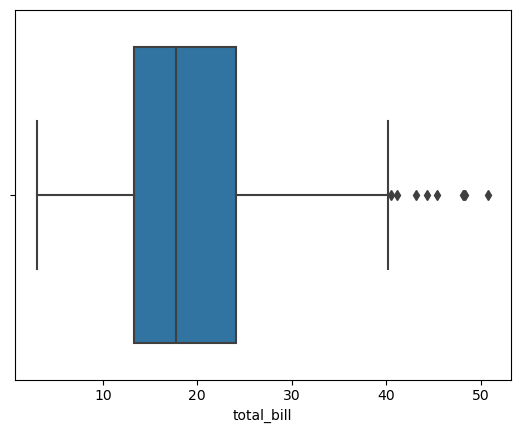

In [172]:
sns.boxplot(x='total_bill',data=newdf)

In [173]:
Q1= newdf['total_bill'].quantile(0.25)
Q3= newdf['total_bill'].quantile(0.75)
IRQ= 1.5*(Q3-Q1)

lowerlimit = Q1-IRQ
higherlimit = Q3+IRQ

In [174]:
print('Tepe limit',higherlimit,'Alt Limit',lowerlimit) # alt sınırı 0 olarak kabul ediyorum

Tepe limit 40.29749999999999 Alt Limit -2.8224999999999945


In [176]:
newdf[newdf['total_bill']>higherlimit]

,isMale,isDinner,isSmoker,total_bill,tip,size
59,1,1,0,48.27,6.73,4
102,0,1,1,44.30,2.50,3
142,1,0,0,41.19,5.00,5
156,1,1,0,48.17,5.00,6
170,1,1,1,50.81,10.00,3
182,1,1,1,45.35,3.50,3
184,1,1,1,40.55,3.00,2
197,0,0,1,43.11,5.00,4
212,1,1,0,48.33,9.00,4


In [178]:
newdf['total_bill'].mask(df['total_bill']>higherlimit,higherlimit,inplace=True)
newdf


,isMale,isDinner,isSmoker,total_bill,tip,size
0,0,1,0,16.99,1.01,2
1,1,1,0,10.34,1.66,3
2,1,1,0,21.01,3.50,3
3,1,1,0,23.68,3.31,2
4,0,1,0,24.59,3.61,4
...,...,...,...,...,...,...
239,1,1,0,29.03,5.92,3
240,0,1,1,27.18,2.00,2
241,1,1,1,22.67,2.00,2
242,1,1,0,17.82,1.75,2


40.29749999999999

<Axes: xlabel='tip'>

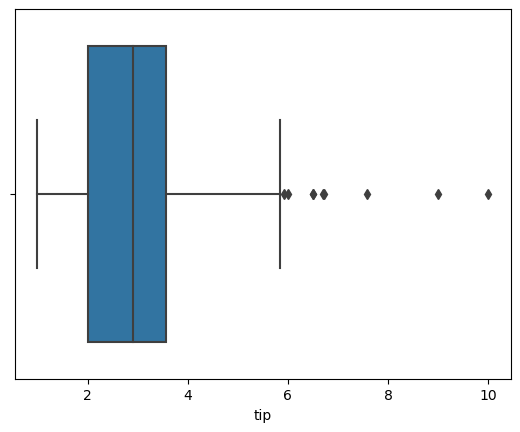

In [62]:
sns.boxplot(x='tip',data=newdf)

In [72]:
Q1_1= newdf['tip'].quantile(0.25)
Q3_1= newdf['tip'].quantile(0.75)
IRQ_1= 1.5*(Q3_1-Q1_1)

lowerlimit_1 = Q1_1-IRQ_1
higherlimit_1 = Q3_1+IRQ_1

In [181]:
print('Tepe limit',higherlimit_1,'Alt Limit',lowerlimit_1) # alt sınırı 0 olarak kabul ediyorum

Tepe limit 5.90625 Alt Limit -0.34375


In [182]:
newdf['tip'].mask(df['tip']>higherlimit_1,higherlimit_1,inplace=True)
newdf

,isMale,isDinner,isSmoker,total_bill,tip,size
0,0,1,0,16.99,1.01000,2
1,1,1,0,10.34,1.66000,3
2,1,1,0,21.01,3.50000,3
3,1,1,0,23.68,3.31000,2
4,0,1,0,24.59,3.61000,4
...,...,...,...,...,...,...
239,1,1,0,29.03,5.90625,3
240,0,1,1,27.18,2.00000,2
241,1,1,1,22.67,2.00000,2
242,1,1,0,17.82,1.75000,2


BASKILAMA YÖNTEMİ İLE AYKIRI DEĞERLER SINIR DEĞERLER İLE DEĞİŞTİRİLDİ

ML Kodu

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
import statsmodels.api as sm
from sklearn import metrics


In [220]:
X= newdf.drop(['total_bill'],axis=1)
y= newdf['total_bill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [221]:
lm = LinearRegression()

In [222]:
model = lm.fit(X_train,y_train)

In [223]:
predictions=model.predict(X_test)

In [224]:
y_test[0:10]

151    13.1300
34     17.7800
109    14.3100
4      24.5900
114    25.7100
233    10.7700
212    40.2975
193    15.4800
172     7.2500
145     8.3500
Name: total_bill, dtype: float64

In [225]:
predictions[0:10]

array([13.80313969, 18.23312348, 22.31120681, 24.52213084, 22.8315424 ,
       11.9544063 , 33.53078233, 15.21157737, 27.32153632,  9.86815731])

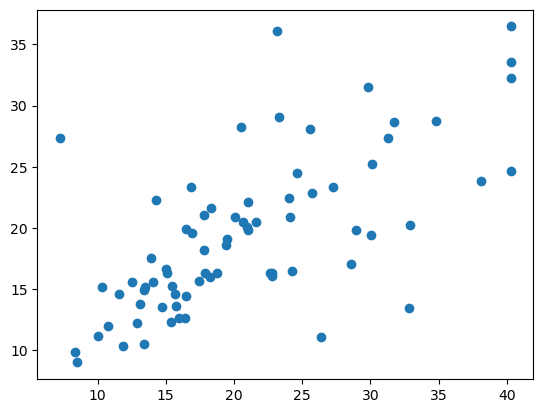

In [226]:
plt.scatter(y_test,predictions) ## Çok da iyi tahmin yaptığı söylenemz

In [229]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

6.32149307594585

TAHMİN BAŞINA +- 1,51 BİRİM KAYMA SÖZ KONUSU

In [230]:
metrics.explained_variance_score(y_test,predictions)

0.4376479295911927

In [231]:
### Çok kötü bir puan ###

<Axes: xlabel='smoker', ylabel='total_bill'>

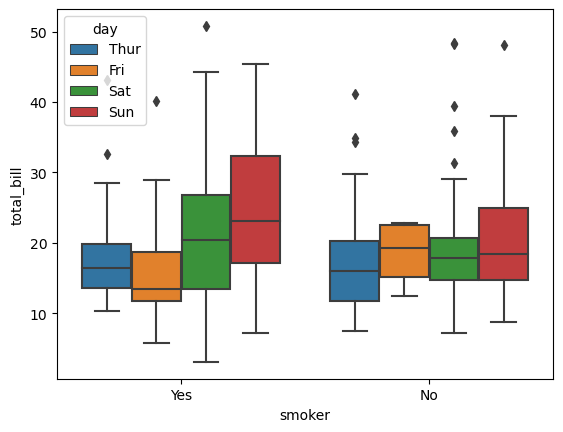

In [232]:
sns.boxplot(x='smoker',y='total_bill',hue='day',data=cafe)

EN FAZLA İŞ YAPAN GÜNÜN PAZAR OLDUĞU GÖRÜLÜYOR HER HALÜKARDA AYRICA SİGARA KULLANAN VE KULLANMAYANLAR 
ARASINDA KULLANANLARIN HAFTA SONU GELDİĞİ GÖZE ÇARPIYOR (SONUÇ OLARAK İŞLETME SAHİBİ EN BAŞARILI GARSONLARINI HAFTA SONU KULLANABİLİR ÖRNEK OLARAK)

<Axes: xlabel='sex', ylabel='total_bill'>

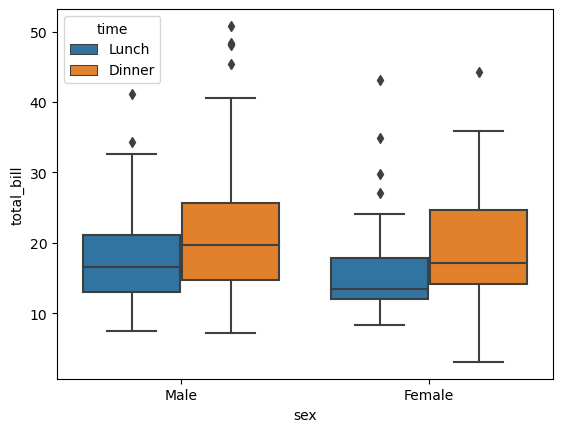

In [234]:
sns.boxplot(x='sex',y='total_bill',hue='time',data=cafe)

İşletme parsını en çok akşam saatlerinde kazanıyor

<Axes: xlabel='day', ylabel='total_bill'>

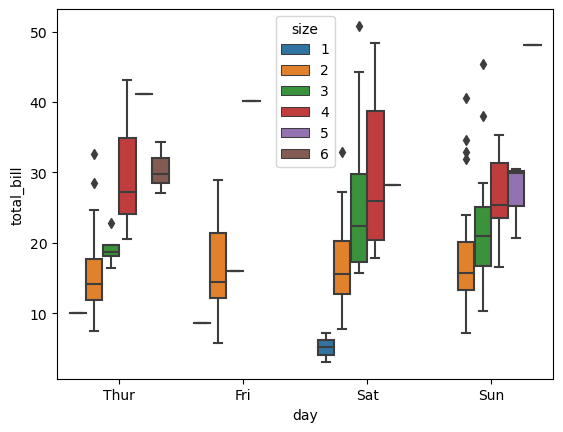

In [237]:
sns.boxplot(x='day',y='total_bill',hue='size',data=cafe)

Cumartesi günü daha çok ailecek yada arkadaşlarla ziyaret ediliyor perşembe günü de göz çarpıyor